In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from  sklearn.model_selection  import  train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

dataset=pd.read_csv('Pima Indians Diabetes Dataset - diabetes.csv')

# Glucose
dataset['Glucose'].replace(0,np.NaN,inplace=True)
mean_Glucose=dataset['Glucose'].mean()
dataset['Glucose'].fillna(mean_Glucose, inplace = True)

# BloodPressure
dataset['BloodPressure'].replace(0,np.NaN,inplace=True)
mean_BloodPressure=dataset['BloodPressure'].mean()
dataset['BloodPressure'].fillna(mean_BloodPressure, inplace = True)

# SkinThickness
dataset['SkinThickness'].replace(0,np.NaN,inplace=True)
mean_SkinThickness=dataset['SkinThickness'].mean()
dataset['SkinThickness'].fillna(mean_SkinThickness, inplace = True)

# Insulin
dataset['Insulin'].replace(0,np.NaN,inplace=True)
mean_Insulin=dataset['Insulin'].mean()
dataset['Insulin'].fillna(mean_Insulin, inplace = True)

# BMI
dataset['BMI'].replace(0,np.NaN,inplace=True)
mean_BMI=dataset['BMI'].mean()
dataset['BMI'].fillna(mean_BMI, inplace = True)

#StSc=StandardScaler()
feature=dataset.drop(["Outcome"],axis = 1)
#feature=  pd.DataFrame(StSc.fit_transform(feature),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
outcome=dataset['Outcome']
train_X, test_X, train_Y, test_Y = train_test_split(feature, outcome, test_size=0.1,random_state=0)
train_X,validate_X,train_Y,validate_Y=train_test_split(train_X, train_Y, test_size=0.2,random_state=0)


max_recall=0;
depth_recall=0;
criteri_maxrecall="entropy";
n_esmax=50;

#Choosing the best model using cross validation by maximizing recall score
for n_estimator in [50,100,150,200,250,300,350,400,450,500]:
    for criteri in ["entropy","gini"]:
        for depth in range(1,20):
            clf = RandomForestClassifier(n_estimators=n_estimator,max_depth=depth,criterion=criteri,random_state=4)
            clf.fit(train_X.values, train_Y.values)
            tn, fp, fn, tp=(metrics.confusion_matrix(validate_Y,clf.predict(validate_X.to_numpy()))).ravel();
            recall=tp/(tp+fn);
            if(recall>max_recall):
                max_recall=recall;
                depth_maxrecall=depth;
                criteri_maxrecall=criteri
                n_esmax=n_estimator

        
print("For best result the depth should be: "+str(depth_maxrecall)+", Criteria should be "+str(criteri_maxrecall)," and n_estimator=",n_esmax)


#Testing the best model with test data
clf = RandomForestClassifier(n_estimators=n_esmax,max_depth=depth_maxrecall,criterion=criteri_maxrecall,random_state=4)
clf.fit(train_X.values, train_Y.values)
tn, fp, fn, tp=(metrics.confusion_matrix(test_Y,clf.predict(test_X.to_numpy()))).ravel();
print("TN :"+str(tn))
print("FP :"+str(fp))
print("FN :"+str(fn))
print("TP :"+str(tp))
accuracy=(tp+tn)/(tp+tn+fp+fn);
recall=tp/(tp+fn);
precisison=tp/(tp+fp)
f1=2*(recall*precisison)/(precisison+recall)

print("Recall = "+str(recall));
print("Precisison = "+str(precisison));
print("Accuracy = "+str(accuracy));
print("F1 score = "+str(f1))

#Pickle dump for website
pickle.dump(clf, open("diabetes.pkl",'wb'))


For best result the depth should be: 6, Criteria should be entropy  and n_estimator= 50
TN :45
FP :6
FN :6
TP :20
Recall = 0.7692307692307693
Precisison = 0.7692307692307693
Accuracy = 0.8441558441558441
F1 score = 0.7692307692307693


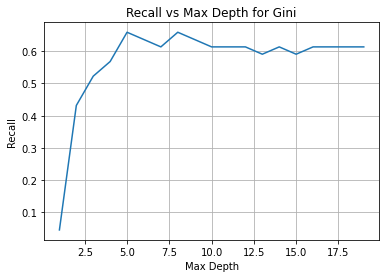

In [5]:
ls=[];
for depth in range(1,20):
    clf = RandomForestClassifier(n_estimators=n_esmax,max_depth=depth,criterion='gini',random_state=4)
    clf.fit(train_X.values, train_Y.values)
    tn, fp, fn, tp=(metrics.confusion_matrix(validate_Y,clf.predict(validate_X.to_numpy()))).ravel();
    recall=tp/(tp+fn);
    ls.append(recall)
plt.plot(range(1,20),ls);
plt.title('Recall vs Max Depth for Gini')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.grid()

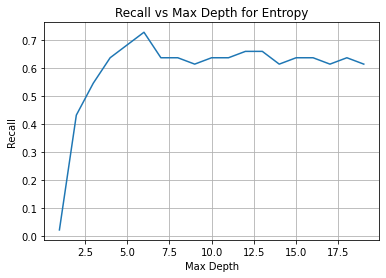

In [6]:
ls=[];
for depth in range(1,20):
    clf = RandomForestClassifier(n_estimators=n_esmax,max_depth=depth,criterion='entropy',random_state=4)
    clf.fit(train_X.values, train_Y.values)
    tn, fp, fn, tp=(metrics.confusion_matrix(validate_Y,clf.predict(validate_X.to_numpy()))).ravel();
    recall=tp/(tp+fn);
    ls.append(recall)
plt.plot(range(1,20),ls);
plt.title('Recall vs Max Depth for Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.grid()

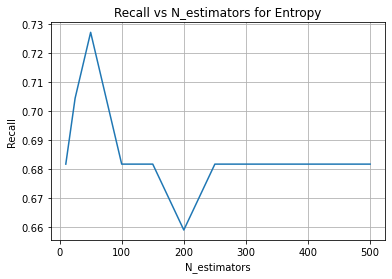

In [9]:
ls=[];
for n_estimator in [10,25,50,100,150,200,250,300,350,400,450,500]:
    clf = RandomForestClassifier(n_estimators=n_estimator,max_depth=depth_maxrecall,criterion='entropy',random_state=4)
    clf.fit(train_X.values, train_Y.values)
    tn, fp, fn, tp=(metrics.confusion_matrix(validate_Y,clf.predict(validate_X.to_numpy()))).ravel();
    recall=tp/(tp+fn);
    ls.append(recall)
plt.plot([10,25,50,100,150,200,250,300,350,400,450,500],ls);
plt.title('Recall vs N_estimators for Entropy')
plt.xlabel('N_estimators')
plt.ylabel('Recall')
plt.grid()

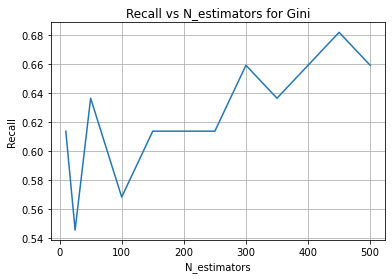

In [10]:
ls=[];
for n_estimator in [10,25,50,100,150,200,250,300,350,400,450,500]:
    clf = RandomForestClassifier(n_estimators=n_estimator,max_depth=depth_maxrecall,criterion='gini',random_state=4)
    clf.fit(train_X.values, train_Y.values)
    tn, fp, fn, tp=(metrics.confusion_matrix(validate_Y,clf.predict(validate_X.to_numpy()))).ravel();
    recall=tp/(tp+fn);
    ls.append(recall)
plt.plot([10,25,50,100,150,200,250,300,350,400,450,500],ls);
plt.title('Recall vs N_estimators for Gini')
plt.xlabel('N_estimators')
plt.ylabel('Recall')
plt.grid()